In [1]:
# Feature Improvement
# Clean and Augment datasets
# Clean - process of altering rows and columns
# Augment - process of removing and adding columns

#  - Identify missing values
#  - Impute missing values
#  - Remove harmful data
#  - Normalize / Standardize data
#  - Construct new features
#  - Select / Eliminate features either manually or automatically
#  - Apply mathematical computations and transformations to get new dimensions of data

In [2]:
# Exploratory Data Analysis
import pandas as pd              # to store tabular data
import numpy as np               # to do math
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns            # for visualization

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
# Notice we don't have column names in the dataset
pima = pd.read_csv('Data/pima.data')
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
# Let us manually add the column names
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
pima = pd.read_csv('Data/pima.data', names=pima_column_names)
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Get "Null Accuracy" from the response variable
# Notice 65% did not develop diabetes
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

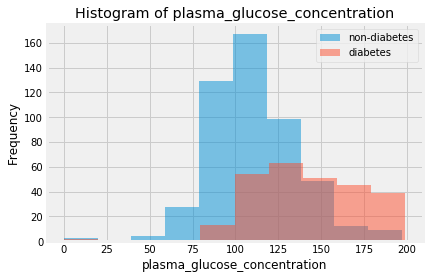

In [6]:
# Let us watch the Glucose concentration between a diabetic and non-diabetic graphically
# Observation: There seems to be a jump of Glucose Concentration in diabetics
col = 'plasma_glucose_concentration'
plt.hist(pima[pima['onset_diabetes'] == 0][col], alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['onset_diabetes'] == 1][col], alpha=0.5, label='diabetes')
plt.legend()
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

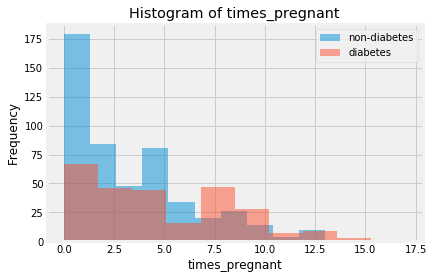

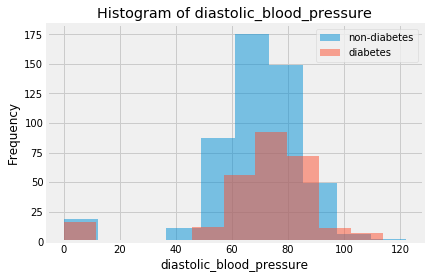

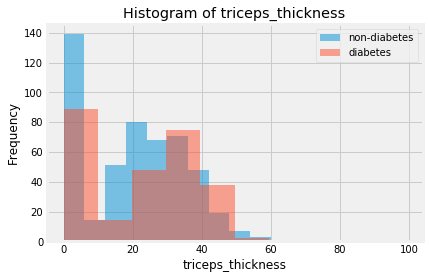

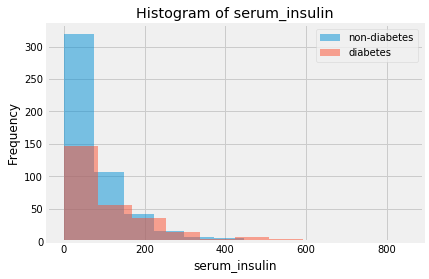

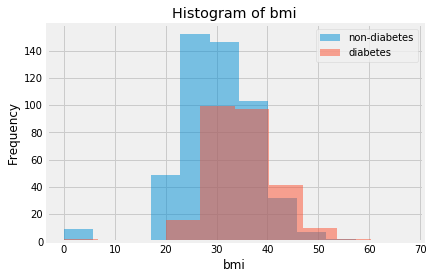

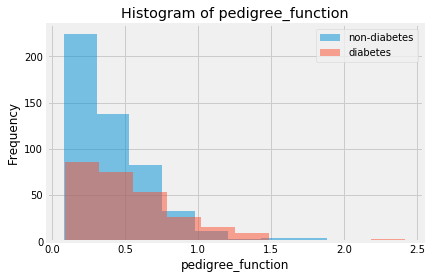

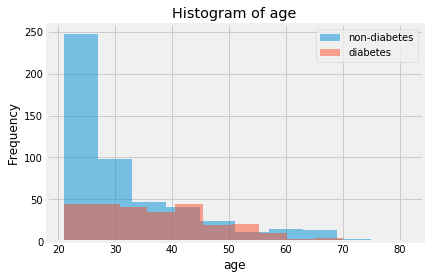

In [7]:
# Let us examine for other columns as well
for col in ['times_pregnant', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age']:
    plt.hist(pima[pima['onset_diabetes'] == 0][col], alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes'] == 1][col], alpha=0.5, label='diabetes')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

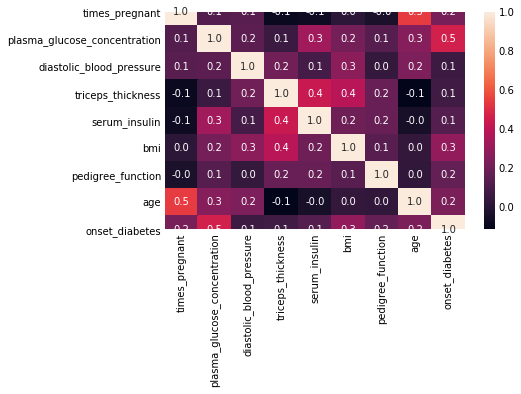

In [8]:
# Let us verify our observation - "There seems to be a jump of Glucose Concentration in diabetics" from correlation heatmap
# As we can notice from the heat map, among all the features, plasma_glucose_concentration has strong correlation with
# onset_diabetes as indicated by the dark red color and the reading of 0.5. [See the last row titled 'onset_diabetes'. 
# It shows all corr coef of 'onset_diabetes' with the rest of features]

# How to read heat map?
# Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. 
# Values closer to zero means there is no linear trend between the two variables. The closer to 1 the correlation is 
# the more positively correlated they are; that is as one increases so does the other and the closer to 1 
# the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing 
# one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating 
# each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color 
# the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two 
# variables are being paired together in those squares.

sns.heatmap(pima.corr(), annot=True, fmt=".1f")

In [9]:
# Let us verify numerically the correlation
# Notice that 'plasma_glucose_concentration' has high correlation coefficient of 0.466581 among others
# Following values state that factors influencing a person to become diabetic are (in order):
# - plasma_glucose_concentration, bmi, age, times_pregnant, etc.

pima.corr()['onset_diabetes']

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

In [10]:
# Let us check for missing values, if any present in the dataset
# It looks like there are no missing values. But let us check more closely to see if it is correct. 
# (In fact, we are being fooled by this statement. Let us continue further ..)

pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [11]:
# Let us see how many observations, columns we have in the dataset
# Notice that Observations = 768, Columns = 9 (including response variable)

pima.shape

(768, 9)

In [12]:
# Let us check basic descriptive statistics
# Note the columns showing min value as 0 are:
#    times_pregnant, plasma_glucose_concentration, diastolic_blood_pressure, 
#    triceps_thickness, serum_insulin, bmi, onset_diabetes

# bmi - can't be zero, so needs investigation (chances are if bmi is not available for a person, it could be equated with 0)
# times_pregnant can take a meaningful 0. So, leaving this untouched we manually replace 0 with 'None' on other columns
# This step helps us apply fillna and dropna methods correctly. 

pima.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# Let us replace 0s with Nulls
# Check for #Nulls in a column before replacement
pima['serum_insulin'].isnull().sum()

0

In [14]:
# Replace 0s with Nulls
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x: x if x != 0 else None)

# Check for #Nulls in a column after replacement
# Notice that 374 0s got replaced with Nulls
pima['serum_insulin'].isnull().sum()

374

In [15]:
# Let us replace 0s with Nulls for multiple columns in an efficient way
columns = ['plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi']
for col in columns:
    pima[col].replace([0], [None], inplace=True)

In [16]:
# Check replacements
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [17]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [18]:
# Check descriptive statistics after filling in 0s with 'None'
# Notice that the describe method doesn't include columns having missing values (Nulls)
# We see only 5 columns in place of 8 columns

pima.describe()

,times_pregnant,serum_insulin,pedigree_function,age,onset_diabetes
count,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,155.548223,0.471876,33.240885,0.348958
std,3.369578,118.775855,0.331329,11.760232,0.476951
min,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,846.000000,2.420000,81.000000,1.000000


In [19]:
# We can manually compute the mean and standard deviation of columns having missing values (Nulls)

pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.6867627785059, 30.53564107280403)

In [20]:
# Removing rows with missing values (Nulls)
pima_dropped = pima.dropna()

# We can calculate % of removed rows
num_rows_lost = round((pima.shape[0] - pima_dropped.shape[0])/pima.shape[0] * 100, 0)
print("Removed {}% of rows from the dataset.".format(100 - num_rows_lost))

Removed 51.0% of rows from the dataset.


In [21]:
# Let us check the % of Diabetics, Non-diabetics before and after removal of missing values
# to assess if there is any impact
# Notice the results:
#                  Diabetes    Non-Diabetes
#    pima            65%         35%
#    pima_dropped    67%         33%
#
# From the table above, appears not much deviation

print(pima['onset_diabetes'].value_counts(normalize=True))
print(pima_dropped['onset_diabetes'].value_counts(normalize=True))

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64
0    0.668367
1    0.331633
Name: onset_diabetes, dtype: float64


In [22]:
# Let us also compare the averages of dataset before and after removing missing values (Nulls)
# Note by comparing at this stage, there appears no big impact, 
# so let us get % of change

print(pima.mean())
print()
print(pima_dropped.mean())

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

times_pregnant                    3.301020
plasma_glucose_concentration    122.627551
diastolic_blood_pressure         70.663265
triceps_thickness                29.145408
serum_insulin                   156.056122
bmi                              33.086224
pedigree_function                 0.523046
age                              30.864796
onset_diabetes                    0.331633
dtype: float64


In [23]:
# % of change in averages of columns; before and after missing value removal

(pima.mean() - pima_dropped.mean())/pima.mean() * 100

times_pregnant                  14.148877
plasma_glucose_concentration    -0.773123
diastolic_blood_pressure         2.405793
triceps_thickness                0.027480
serum_insulin                   -0.326522
bmi                             -1.937184
pedigree_function              -10.843862
age                              7.148093
onset_diabetes                   4.964971
dtype: float64

Text(0, 0.5, '% change')

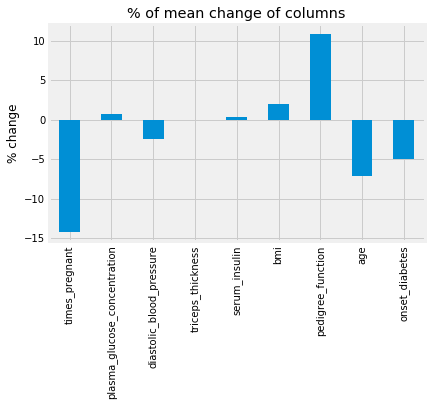

In [24]:
# Let us visualize the results above as a bar chart
# Note
#   1) Average 'times_pregnant'fell by 14% is considerable
#   2) Average 'pedigree_function' is up by 11% is also considerable
#
# So our assumption of no much deviation or impact of dropping null rows proved "wrong"

ax = ((pima_dropped.mean() - pima.mean())/pima.mean() * 100).plot(kind='bar', title="% of mean change of columns")
ax.set_ylabel('% change')

In [25]:
# We are checking metrics on null-rows dropped dataset with one of the algorithms and comparing with Null accuracy that
# we found earlier
# Notice the results:
#                   rows  score
#    pima           768    65%
#    pima_dropped   392    74% (with KNN)
#
# So, who knows if we can use all the 768 (without dropping null rows but by imputing missing values with meaningful
# values) we may gain much more accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
y_dropped = pima_dropped['onset_diabetes']

print ("learning from {} rows".format(X_dropped.shape[0]))

knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print (grid.best_score_, grid.best_params_)

learning from 392 rows


C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7448979591836735 {'n_neighbors': 7}


C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
# Let us check the difference in filling missing values with zero with the help of KNN
# We notice that
#    Dropping the rows of missing values gave performance of 74.5% (working on 392 rows)
#    Replacing the rows of missing values with 0s gave performance - 73% (working on 768 rows)
# So, our target is now to get performance more than 74.5% with all the 768 rows by replacing the missing values with
# 'appropriate' value

pima_zero = pima.fillna(0)

x_zero = pima_zero.drop('onset_diabetes', axis=1)
y_zero = pima_zero['onset_diabetes']

print("Learning from {} rows.".format(x_zero.shape[0]))

knn_params = {'n_neighbors' : [1, 2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(knn, knn_params)
grid.fit(x_zero, y_zero)

print(grid.best_score_, grid.best_params_)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Learning from 768 rows.
0.73046875 {'n_neighbors': 6}


In [27]:
# Imputing missing values in the dataset
#   It is the act of filling in missing data values with the numerical quantities that are somehow ascertained
#   from existing knowledge/data.

In [28]:
# Check how many missing values exist in pima
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [29]:
# Check top 5 rows of 'plasma_glucose_concentration', for example
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

In [30]:
# FOR SOME REASON FOLLOWING FAILED. I'VE CONTINUED AS I'LL BE USING SCIKIT'S 'IMPUTER' INSTEAD ON ENTIRE DATASET
# Replace the 'null' values with 'average' of 'plasma_glucose_concentration'
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean())
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

In [31]:
# Use Scikit's imputer to fill null values with mean, median, etc.
# Note: The imputer returns an array; not dataframe, so we may have to cast it to a dataframe

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
pima_imputed = imputer.fit_transform(pima)

pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)

pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [32]:
# Let us confirm if the values are replaced with mean value
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [33]:
# Let us check none of the columns has null values
pima_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

__Demonstrate correct procedure of imputing__<br/>
<u>Incorrect Procedure</u><br/>
    Compute mean of serum_insulin column and fill missing values with mean before splitting data into train and test sets.<br/>

<u>Correct Procedure</u><br/>
   Split the serum_insulin column into training and testing data. (Both of them will have missing values)<br/>
   Compute mean from training set and fill both training and testing sets with this mean value.<br/>

In [34]:
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X.isnull().sum()

serum_insulin    374
dtype: int64

In [35]:
# Improper way of Imputing i.e. imputing the values before data split into train and test
# Note, mean of entire data set means entire column mean

entire_data_set_mean = X.mean()
print("Entire dataset mean of {}".format(entire_data_set_mean))
X = X.fillna(entire_data_set_mean)

Entire dataset mean of serum_insulin    155.548223
dtype: float64


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.65625

In [38]:
# Proper way of Imputing i.e. imputing the values after data split into train and test
# This is of course a much lower accuracy, but at least it is a more honest representation of the model's ability 
# to learn from the training set's features and apply what it learned to unseen and withheld testing data

X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# Compute "mean" on training set (not on combined train and test set)
training_mean = X_train.mean()
print("Training mean value of {}".format(training_mean))

# Fill both train and test set missing values with the "mean" computed only on training set (from the above step)
X_train.fillna(training_mean, inplace = True)
X_test.fillna(training_mean, inplace = True)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

Training mean value of serum_insulin    158.546053
dtype: float64


C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0.4895833333333333

Conclusion:<br/>In the above exercise, we've obtained lower accuracy score by following correct procedure but still we should follow the correct procedure only.

## Pipelines

In [39]:
# Scikit's pipeline streamlines the structure and order of statements
# Demonstration of a Pipeline
# Testing with strategy = "mean"

from sklearn.pipeline import Pipeline

knn_params = {'classify__n_neighbors' : [1, 2, 3, 4, 5, 6, 7]}

knn = KNeighborsClassifier()
mean_impute = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy="mean")), 
                        ('classify', knn)])

X = pima.drop('onset_diabetes', axis = 1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7317708333333334 {'classify__n_neighbors': 6}


In [40]:
# Demonstration of a Pipeline
# Testing with strategy = "median"

# Let us see now, Scikit's pipeline imputing 'median' instead of 'mean'
# Note again, that the accuracy (73.6%) may be lower than the model's fit(74.5%) on dropped rows but 
# we've achieved it on more than twice the size of the dataset with missing values

knn_params = {'classify__n_neighbors' : [1, 2, 3, 4, 5, 6, 7]}

knn = KNeighborsClassifier()
median_impute = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy="median")), 
                          ('classify', knn)])

X = pima.drop('onset_diabetes', axis = 1)
y = pima['onset_diabetes']

grid = GridSearchCV(median_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7356770833333334 {'classify__n_neighbors': 6}


In [41]:
# Recap of our exercise using pipelines
# ------------------------------------------------------------------------
# Pipeline Description                   # Rows model      Cross-validated
#                                          learned from       accuracy
# ------------------------------------------------------------------------
# Drop missing value rows                      392               74.5
# Impute values with 0                         768               73.0
# Impute values with mean of column            768               73.2
# Impute values with median of column          768               73.6

In [42]:
# So far, we've just imputed some statistic and fit a model to the dataset
# Some machine Learning models rely on learning methods that are affected greatly by the varying scales of columns of data

# If the columns of the dataset are at different scales then the modeling algorithm may not fit the data well.
# So, we rescale the data to bring to one level 
#    - like standard normal form with mean of 0 and standard deviation of 1 or
#    - like standard form with mean of mu and standard devation of sigma

# List of few algorithms which are affected by "scale of data":
# 1) KNN - Due to reliance on Euclidean distance
# 2) K-means clustering - Due to reliance on Euclidean distance
# 3) Logistic regression, Support Vector Machines, Neural networks - affected, if we use gradient descent to learn weights
# 4) Principal Component Analysis - eigen vectors will be skewed towards larger columns

In [43]:
#  let us examine the data 
#         - graphically(using histogram) and 
#         - statistically (descriptive statistics)

In [44]:
# Let us first compute mean(s) and impute missing values

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns=pima_column_names)
pima_imputed_mean.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAF29EEF98>,
      dtype=object)

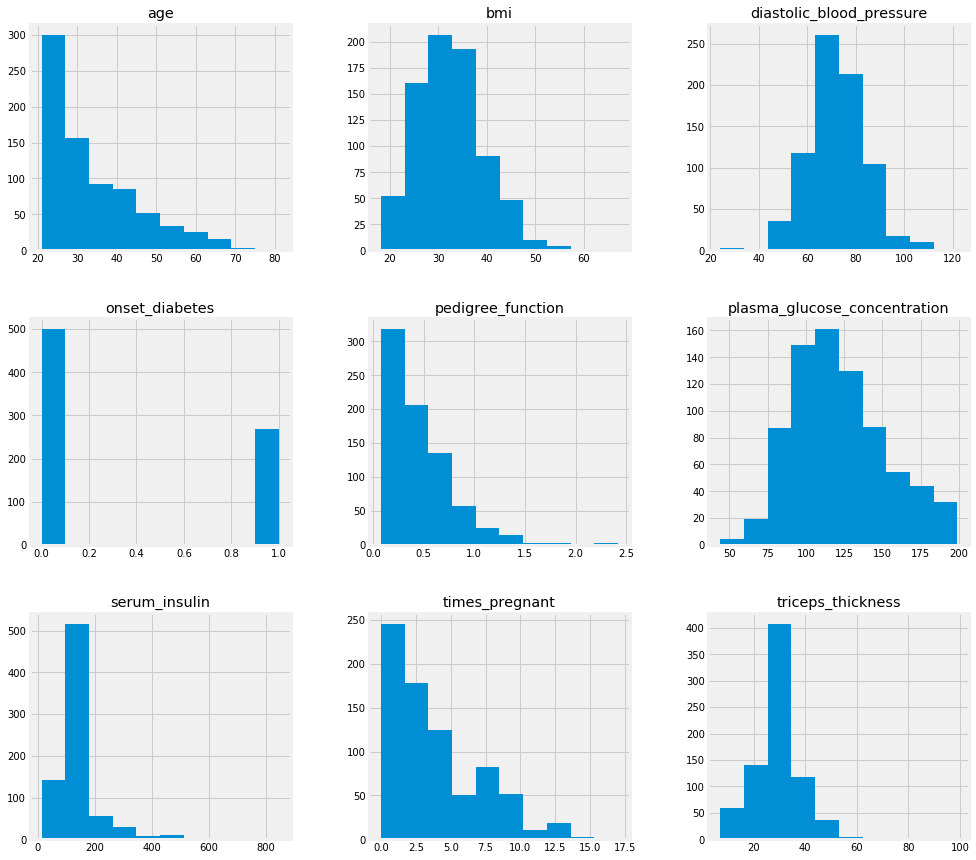

In [45]:
# Let us view the distribution of values of columns of dataset graphically
# Notice: Each column is at a different scale and so at different mean, min, max, standard deviation
pima_imputed_mean.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAF21D64E0>,
      dtype=object)

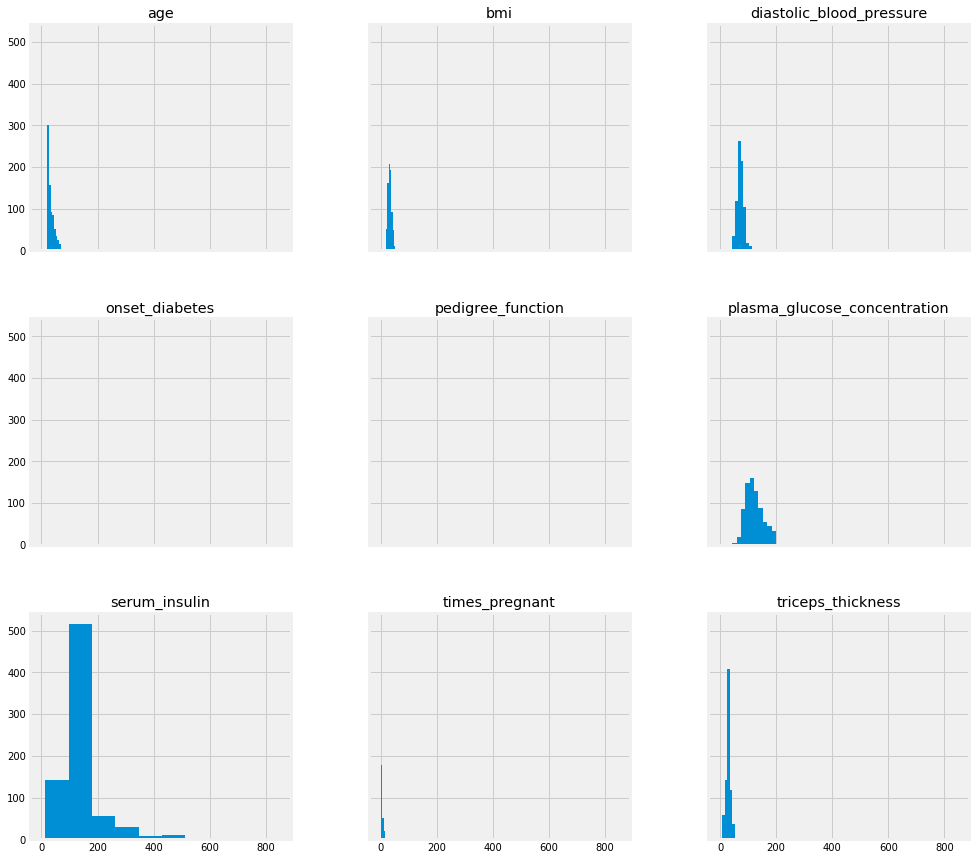

In [46]:
# We can visualize the columns bringing all of them to the same scale as well

pima_imputed_mean.hist(figsize=(15,15), sharex=True, sharey=True)

In [47]:
# Let us confirm the stats numerically
pima_imputed_mean.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
# Let us apply following Normalization techniques
#     - z-score Normalization (Column-wise normalization)
#     - min-max scaling       (Column-wise normalization)
#     - Row Normalization     (Row-wise normalization)
# then we impute and fit a model to the dataset and see the results

In [2]:
# Z-score Normalization (Column-wise Normalization)
# ================================================
#   z = (x - μ) / σ
#   z is our new value (z-score)
#   x is the previous value of the cell
#   μ is the mean of the column
#   σ is the standard deviation of the columns

In [50]:
# "Manual computation" of the statistics on a column
μ = pima['plasma_glucose_concentration'].mean()
σ = pima['plasma_glucose_concentration'].std()
z = (pima['plasma_glucose_concentration'] - μ) / σ

print("μ = {}".format(μ))
print("σ = {}".format(σ))
z.head()

μ = 121.6867627785059
σ = 30.53564107280403


0    0.861722
1    -1.20144
2     2.00792
3    -1.07045
4    0.501487
Name: plasma_glucose_concentration, dtype: object

μ (Before Normalization) = 121.6867627785059
σ (Before Normalization) = 30.53564107280403


Text(0.5, 1.0, 'Distribution of Plasma Glucose Concentration before Normalization')

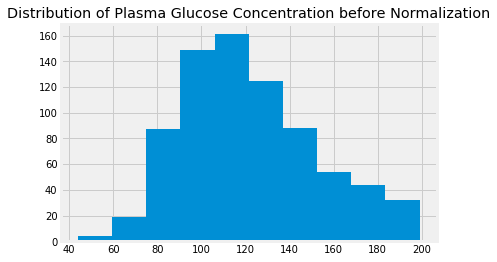

In [51]:
# "Scikit learn's computation" of the statistics on a column "before Normalization"

# Mean, standard deviation and histogram before applying normalization
print("μ (Before Normalization) = {}".format(pima['plasma_glucose_concentration'].mean()))
print("σ (Before Normalization) = {}".format(pima['plasma_glucose_concentration'].std()))

ax = pima['plasma_glucose_concentration'].hist()
ax.set_title('Distribution of Plasma Glucose Concentration before Normalization')

μ (After Normalization) = nan
σ (After Normalization) = nan


Text(0.5, 1.0, 'Distribution of Plasma Glucose Concentration after Normalization')

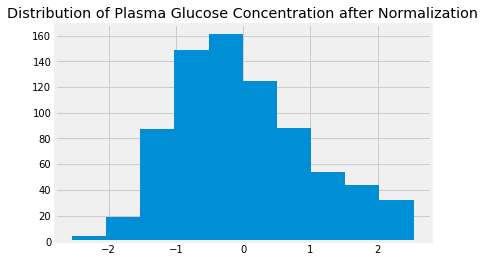

In [52]:
# Scikit learn's computation of the statistics on a column "after normalization"
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
glucose_z_score_standardized = scaler.fit_transform(pima[['plasma_glucose_concentration']])

# Mean, standard deviation and histogram after applying normalization
print("μ (After Normalization) = {}".format(glucose_z_score_standardized.mean()))
print("σ (After Normalization) = {}".format(glucose_z_score_standardized.std()))

ax = pd.Series(glucose_z_score_standardized.reshape(-1)).hist()
ax.set_title('Distribution of Plasma Glucose Concentration after Normalization')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAF30D5898>,
      dtype=object)

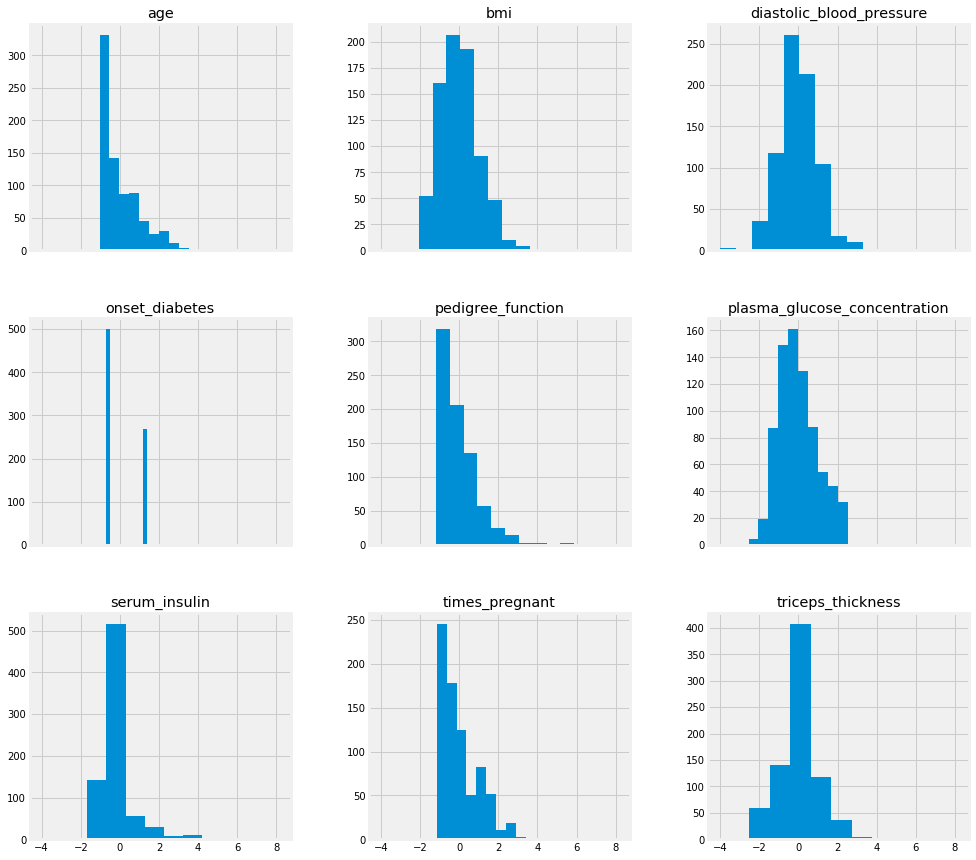

In [53]:
# Let us see the histogram of columns after normalization

scale = StandardScaler()

pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima_column_names)
pima_imputed_mean_scaled.hist(figsize=(15, 15), sharex=True)

In [54]:
# Let us now fit model to the "z-score normalized" dataset

knn_params = {'imputer__strategy' : ['mean', 'median'], 
              'classify__n_neighbors' : [1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), 
                                    ('standardize', StandardScaler()), 
                                    ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)                  # Step 2
grid.fit(X, y)                                                            # Triggers so step 1

print(grid.best_score_, grid.best_params_)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7434895833333334 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


In [55]:
# min-max Normalization (Column-wise Normalization)
# ================================================
# Min-max scaling is similar to z-score normalization in that it will replace every value in a column 
# with a new value using a formula
#
#      m = (x - xmin ) / (xmax - xmin )
#
#      m is our new value
#      x is the original cell value
#      xmin is the minimum value of the column
#      xmax is the maximum value of the column

In [56]:
# Let us apply the MinMaxScaler and notice that for all columns min = 0, max = 1
# Note the side effect:
# The standard deviations are now all very very small. 
# This can hurt some models as it takes away weight from outliers.

from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima_column_names)
pima_min_maxed.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Now, let us apply the model to the dataset to check the results
# Notice that the accuracy(74.6%) we got is the best on methods we've tried so far

knn_params = {'imputer__strategy' : ['mean', 'median'], 
              'classify__n_neighbors' : [1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), 
                                    ('standardize', MinMaxScaler()), 
                                    ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.74609375 {'classify__n_neighbors': 4, 'imputer__strategy': 'mean'}


In [58]:
# Row Normalization (Row-wise Normalization)
# =========================================
# Instead of calculating statistics on each column, mean, min, max, and so
# on, the row normalization technique will ensure that each row of data has
# a unit norm, meaning that each row will be the same vector length
# If the row vector x = (x1, x2, x3, ..., xn) then 
# the norm would be ||x|| = Sqrt(x1^2 + x2^2 + x3^2 + .. + xn^2) called "L2 Norm"

In [59]:
np.sqrt((pima_imputed**2).sum(axis=1)).mean()

223.36222025823744

In [60]:
# Let us apply the Normalizer

from sklearn.preprocessing import Normalizer

normalize = Normalizer()
pima_normalized = pd.DataFrame(normalize.fit_transform(pima_imputed), columns=pima_column_names)
pima_normalized.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,0.025315,0.624441,0.303782,0.147672,0.656289,0.141765,0.002645,0.210960,0.004219
1,0.005111,0.434404,0.337302,0.148208,0.794950,0.135943,0.001794,0.158430,0.000000
2,0.031558,0.721892,0.252465,0.115003,0.613601,0.091913,0.002651,0.126232,0.003945
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0.000000
4,0.000000,0.596381,0.174126,0.152360,0.731328,0.187620,0.009960,0.143654,0.004353


In [61]:
# Now, let us apply the model to the dataset to check the results
# Note that we've got accuracy of 68.2% in normalized dataset

knn_params = {'imputer__strategy' : ['mean', 'median'], 
              'classify__n_neighbors' : [1, 2, 3, 4, 5, 6, 7]}

mean_impute_normalize = Pipeline([('imputer', SimpleImputer()), 
                                    ('normalize', Normalizer()), 
                                    ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_normalize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6822916666666666 {'classify__n_neighbors': 6, 'imputer__strategy': 'mean'}


In [62]:
# Summary
# Recap of our exercise using pipelines
# ------------------------------------------------------------------------
# Pipeline Description                   # Rows model      Cross-validated
#                                          learned from       accuracy
# ------------------------------------------------------------------------
# Drop missing value rows                      392               74.5
# Impute values with 0                         768               73.0
# Impute values with mean of column            768               73.2
# Impute values with median of column          768               73.6
#
# Z-score normalization with imputed median    768               74.2
# Min-max normalization with imputed mean      768               74.6
# Row normalization with imputed mean          768               68.2
# ----------------------------------------------------------------------